# LAB 01.01 - WARM UP

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [46]:
from local.lib.rlxmoocapi import submit, session
import inspect
student = session.Session(init.endpoint).login( course_id=init.course_id, lab_id="L01.01" )

username: davida.torres@udea.edu.co
password: ··········
using session UDEA


## Task 1: An operation with matrices

Given the following matrices and vectors:

- $X \in \mathbb{R}^{m\times n}$
- $y \in \mathbb{R}^m$
- $W \in \mathbb{R}^{n\times 1}$
- $b \in \mathbb{R}$

Complete the following function so that it computes the following value:

$$\text{mean}\big(\text{relu}(X \times W + b) - y)^2\big)$$

observe that:

- $X\times W \in \mathbb{R}^m$ and $b \in \mathbb{R}$, so $b$ gets added (_broadcasted_) to all elements of $X \times W$
- $\text{mean}$ is the mean of the elements of an vector with $m$ elements.
- The result is a number $\in \mathbb{R}$
- $\text{relu}(z)=\text{max}(0,z)$ is a function $\mathbb{R}\rightarrow\mathbb{R}$ that when applied to a vector is also **broadcasted** (applied individually to each element of the vector)

**CHALLENGE**: Solve it with a single line of Python code (not counting the `relu` function definition).

In [5]:
import numpy as np

def operation(X,y,W,b):
    relu = lambda x: x*(x>0)
    return np.mean ( (relu(X@W+b)-y)**2)

test your code with the following case, which should result in `0.15848`

In [ ]:
X = np.array([[-0.09348275, -0.17182042, -0.29143506],
              [ 0.34581753,  0.37816707,  0.39850916],
              [ 0.23478876, -0.07832256,  0.10793716],
              [-0.1746856 , -0.10240038, -0.27959607]])

y = np.array([[-0.47312685],
              [ 0.42086142],
              [ 0.44194868],
              [ 0.46536898]])
W = np.array([[0.12650597],
              [0.49952987],
              [0.34470552]])

b = -0.02

In [ ]:
operation(X,y,W,b)

0.15848356715672943

test your code with random input values. This is actually what the **automatic grader** does

In [ ]:
m,n = np.random.randint(5, size=2)+2
X = np.random.random(size=(m,n))-0.5
W = np.random.random(size=(n,1))-0.5
b = np.random.random()-0.5
y = np.random.random(size=n)-0.5
print ("X=\n", X)
print ("y=\n", y)
print ("W=\n", W)
print ("b=\n", b)
print ("an_operation=", operation(X,y,W,b))

X=
 [[-0.26719251 -0.47442624]
 [ 0.36101301  0.12588389]
 [-0.18500106 -0.05288603]]
y=
 [-0.45871233 -0.19395269]
W=
 [[ 0.09117982]
 [-0.36020186]]
b=
 0.42428032161915596
an_operation= 0.6563501702685793


**Submit your solution**

In [ ]:
student.submit_task(namespace=globals(), task_id='T1');

## Task 2: Function `argmax`

Complete the following function such that when, given as argument a function `f(x)` with $x\in\mathbb{R}$, returns the value of $x$ which maximizes `f(x)`. If there is more than one value that maximizes the function, just return any one of those. 

Your return value must be exact up to 1 decimal position, and must be a number of type `float` (not a `numpy` array or any other type of object)

**HINT**: Use [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) with the `BFGS` method, with a `lambda` function.

**CHALLENGE**: Solve it with one single line of code (not counting the `import`)

In [44]:
def argmax(f):
    from scipy.optimize import minimize
    return round(minimize(lambda x:-f(x),0,method='BFGS').x[0],1)

Test your code, the following two functions must have their max on `x=1` and `x=-2` approx.

In [31]:
def A(x):
    return -(x-1)**2

B = lambda x: -(x+2)**4

Text(0.5, 1.0, 'B(X)')

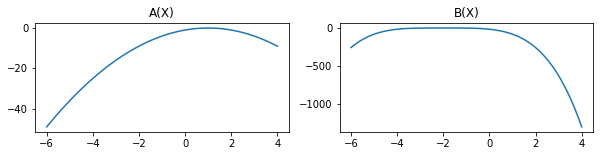

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-6,4, 100)
plt.figure(figsize=(10,2))
plt.subplot(121); plt.plot(x, A(x)); plt.title("A(X)")
plt.subplot(122); plt.plot(x, B(x)); plt.title("B(X)")

In [45]:
argmax(A),argmax(B)

(1.0, -2.0)

**Submit your solution**

In [47]:
student.submit_task(namespace=globals(), task_id='T2');